/tmp/ipykernel_21100/259493341.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: float(x.replace(',', '.')))


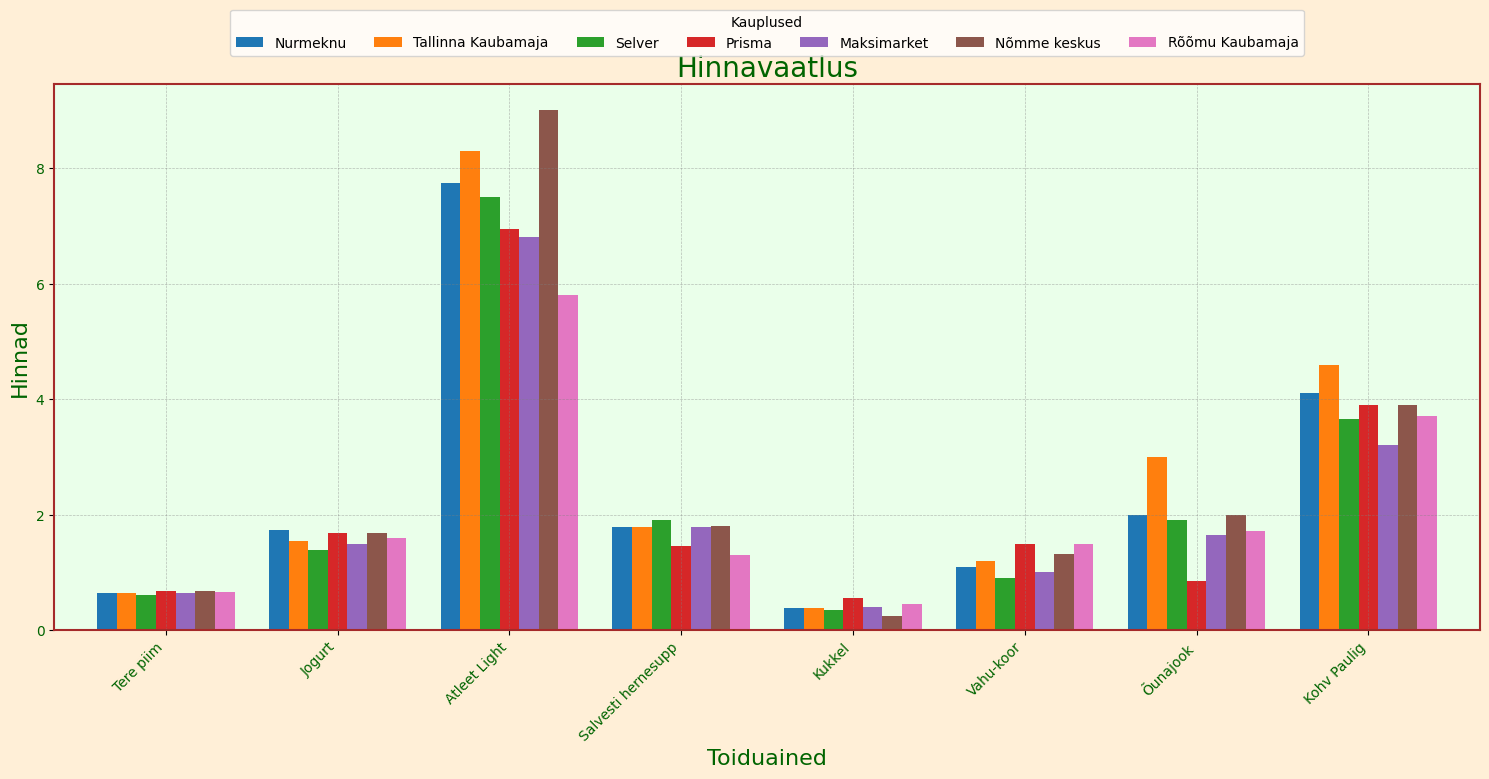

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('mydatabase.db')

# Query all data from the table (or adjust the query as needed)
query = "SELECT * FROM store_prices"
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Transpose the DataFrame
df = df.transpose()

# Set the first row as the new header
df.columns = df.iloc[0]

# Drop the first row that is now redundant
df = df.drop(df.index[0])

# Ensure the index reflects the product names
df.index.name = 'Product'

# Convert all price strings to floats, replace commas with dots
df = df.applymap(lambda x: float(x.replace(',', '.')))

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(15, 8))  # Adjust the figure size to match your actual needs

# Set the background color for the axes and the figure
ax.set_facecolor('#eaffea')  # Light green, as in the chart
fig.patch.set_facecolor('#ffefd7')  # Khaki, as in the chart

# Set the borders of the axes
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_edgecolor('brown')  # Brown color for the borders, match with your image
    spine.set_linewidth(1.5)

# Plot the bar chart
df.plot(kind='bar', ax=ax, width=0.8)  # Adjust the bar width to match your image

# Add titles and labels with a specific font size and color
plt.title('Hinnavaatlus', fontsize=20, color='darkgreen')  # Change the font size and color to match your image
plt.xlabel('Toiduained', fontsize=16, color='darkgreen')  # Change the font size and color to match your image
plt.ylabel('Hinnad', fontsize=16, color='darkgreen')  # Change the font size and color to match your image

# Rotate the x-tick labels for better readability
plt.xticks(rotation=45, horizontalalignment='right', color='darkgreen')  # Match the color with your image
plt.yticks(color='darkgreen')  # Match the color with your image

# Add the legend with a title, and place it at the top of the plot, centered
plt.legend(title='Kauplused', loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(df.columns))

# Show the grid with a specific style
plt.grid(True, color='grey', linestyle='--', linewidth=0.5, alpha=0.5)  # Match the style with your image

# Display the plot
plt.tight_layout()  # Adjust the layout
plt.show()
